In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to load the network, compute degree distribution, and plot it
    # Load the .gexf file as a NetworkX graph
file_path = "citation_network_20241105_233605.gexf"  # Replace with your actual file path
print(f"Loading network from {file_path}...")
G = nx.read_gexf(file_path)
print(f"Network loaded with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Loading network from citation_network_20241105_233605.gexf...
Network loaded with 93350 nodes and 95372 edges.


[0, 12, 1, 5, 2, 3, 24, 15, 4, 17, 66, 42, 6, 10, 7, 23, 14, 9, 156, 58, 20, 8, 26, 47, 19, 36, 11, 13, 27, 888, 31, 101, 18, 29, 75, 16, 100, 30, 96, 322, 71, 123, 21, 22, 25, 50, 32, 28, 37, 192, 35, 484, 95, 218, 44, 61, 87, 118, 98, 680, 94, 148, 65, 46, 228, 33, 34, 41, 76, 67, 53, 465, 40, 59, 45, 49, 62, 91, 48, 326, 43, 81, 80, 2525, 139, 144, 140, 253, 983, 38, 172, 206, 183, 235, 195, 56, 295, 425, 213, 115, 119, 39, 85, 60, 70, 323, 920, 68, 72, 74, 125, 512, 103, 1109, 245, 88, 442, 220, 333, 78, 258, 168, 109, 54, 180, 82, 190, 104, 456, 242, 262, 64, 720, 110, 340, 102, 52, 875, 244, 116, 312, 721, 167, 106, 122, 107, 159, 164, 86, 89, 186, 63, 177, 112, 83, 1024, 411, 280, 176, 179, 69, 847, 1750, 185, 142, 108, 55, 219, 171, 194, 151, 120, 128, 563, 160, 266, 111, 57, 4125, 372, 272, 286, 221, 114, 276, 304, 149, 92, 126, 174, 329, 2293, 209, 73, 492, 621, 137, 351, 99, 324, 615, 182, 184, 77, 291, 381, 93, 480, 972, 79, 133, 231, 313, 535, 1038, 178, 147, 271, 222, 119

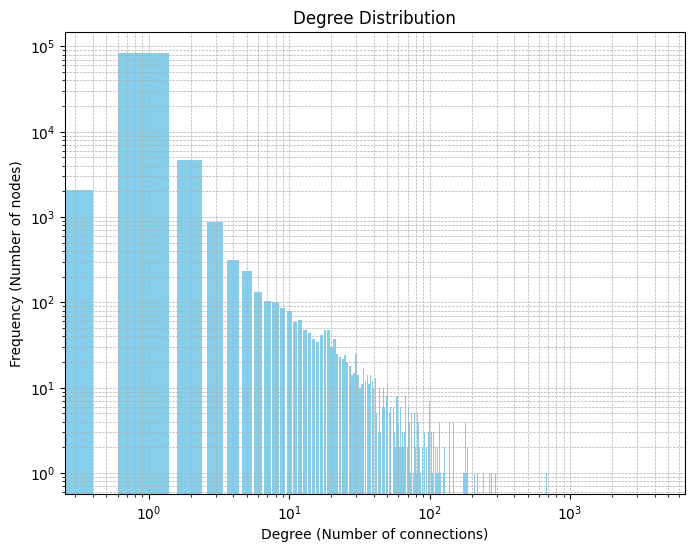


Degree Distribution Statistics:
Average degree: 2.0433208355650776
Maximum degree: 4125
Minimum degree: 0
Degree variance: 578.0012727428066


In [5]:

# Compute the degree of each node
degrees = [deg for node, deg in G.degree()]

# Calculate degree distribution (frequency of each degree)
degree_count = {}
for degree in degrees:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1

# Extract degree values and their frequencies
degree_values = list(degree_count.keys())
frequency_values = list(degree_count.values())

# Plotting the degree distribution
plt.figure(figsize=(8, 6))
print(degree_values)
print(frequency_values)
plt.bar(degree_values, frequency_values, color="skyblue")
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution")
plt.xlabel("Degree (Number of connections)")
plt.ylabel("Frequency (Number of nodes)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Print related statistics
print("\nDegree Distribution Statistics:")
print(f"Average degree: {np.mean(degrees)}")
print(f"Maximum degree: {max(degrees)}")
print(f"Minimum degree: {min(degrees)}")
print(f"Degree variance: {np.var(degrees)}")

# File path to the .gexf file



In [6]:
# find the node with max degree
max_degree_node = max(dict(G.degree()).items(), key=lambda x: x[1])

In [7]:
max_degree_node

('10.1016/j.tplants.2004.08.009', 4125)

In [ ]:
import networkx as nx
import numpy as np

# Function to calculate and display various properties of a directed graph
def analyze_directed_graph_properties(G: nx.DiGraph):
    # Check if the graph has nodes and edges
    if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        print("The graph has no nodes or edges. Please check the graph input.")
        return
    
    print("\nDirected Network Properties")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    
    # Calculate in-degree and out-degree
    in_degrees = [deg for node, deg in G.in_degree()]
    out_degrees = [deg for node, deg in G.out_degree()]
    
    print(f"Average in-degree: {np.mean(in_degrees)}")
    print(f"Maximum in-degree: {max(in_degrees)}")
    print(f"Minimum in-degree: {min(in_degrees)}")
    print(f"In-degree variance: {np.var(in_degrees)}")

    print(f"Average out-degree: {np.mean(out_degrees)}")
    print(f"Maximum out-degree: {max(out_degrees)}")
    print(f"Minimum out-degree: {min(out_degrees)}")
    print(f"Out-degree variance: {np.var(out_degrees)}")

    # Calculate density
    density = nx.density(G)
    print(f"Density of the graph: {density}")
    
    # Check connectivity
    if nx.is_strongly_connected(G):
        print("The graph is strongly connected.")
        diameter = nx.diameter(G)
        avg_shortest_path_length = nx.average_shortest_path_length(G)
        print(f"Diameter (longest shortest path): {diameter}")
        print(f"Average shortest path length: {avg_shortest_path_length}")
    else:
        print("The graph is not strongly connected.")
        # Weakly connected components (ignores direction)
        num_weakly_connected = nx.number_weakly_connected_components(G)
        print(f"Number of weakly connected components: {num_weakly_connected}")
        # Strongly connected components (respects direction)
        num_strongly_connected = nx.number_strongly_connected_components(G)
        print(f"Number of strongly connected components: {num_strongly_connected}")
    
    # Calculate clustering coefficient (using weakly connected component if disconnected)
    avg_clustering = nx.average_clustering(G.to_undirected())
    print(f"Average clustering coefficient (undirected view): {avg_clustering}")

    # Centrality measures for directed graphs
    in_degree_centrality = nx.in_degree_centrality(G)
    out_degree_centrality = nx.out_degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)  # Closeness centrality works for directed graphs
    betweenness_centrality = nx.betweenness_centrality(G)
    
    print("\nCentrality Metrics:")
    print(f"Highest in-degree centrality: {max(in_degree_centrality.values()):.4f}")
    print(f"Highest out-degree centrality: {max(out_degree_centrality.values()):.4f}")
    print(f"Highest closeness centrality: {max(closeness_centrality.values()):.4f}")
    print(f"Highest betweenness centrality: {max(betweenness_centrality.values()):.4f}")
    
    # Community detection (using weakly connected component if disconnected)
    try:
        from networkx.algorithms.community import girvan_newman
        G_sub = G.to_undirected()
        communities = next(girvan_newman(G_sub))
        print(f"Detected {len(communities)} communities.")
    except ImportError:
        print("Community detection library is not installed.")
    except Exception as e:
        print(f"Community detection failed: {e}")

# Example usage
analyze_directed_graph_properties(G)



Directed Network Properties
Number of nodes: 93350
Number of edges: 95372


Average in-degree: 1.0216604177825388
Maximum in-degree: 4125
Minimum in-degree: 0
In-degree variance: 579.608143574025
Average out-degree: 1.0216604177825388
Maximum out-degree: 31
Minimum out-degree: 0
Out-degree variance: 0.17444244922596358
Density of the graph: 1.0944524502485713e-05
The graph is not strongly connected.
Number of weakly connected components: 3779
Number of strongly connected components: 93349
Average clustering coefficient (undirected view): 0.009206118657119717
